#Сверточные нейронные сети

**Цель работы:**

обучить свёрточную сеть распознавать изображения.

Для ускорения исполнения команд был изменен аппаратный ускоритель на T4 GPU.

Устанавливается специальная библиотека глубокого обучения Keras для доступа к данным MNIST при помощи встроенных функций.

In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=6bc998af6c7ed12e548f6dea19920b791e8423b4e7f1a0f9fcbb9792dedbbe6d
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


Осуществляется загрузка набора изображений рукописных цифр MNIST.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data() # загрузка данных

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[0]

5

In [ ]:
y_test[0]

7

По выведенным данным видно, что и обучающие и тестовые данные похожи, однако образы одинаковых цифр могут иметь различные представления в изображениях. Один элемент набора представляет собой матрицу цветов, задающую образ, (X_train / X_test) и число (y_train / t_test), которое является меткой принадлежности к классу.

Всего для данных присутствуют 10 классов. Каждая цифра означает класс (0-9).

Визуализированы 4 случайных изображения из тренировочного набора и 4 случайных изображения из валидационного набора. Также для тестового и обучающих данных выведены соответвующие метки классов.

Обучающие данные


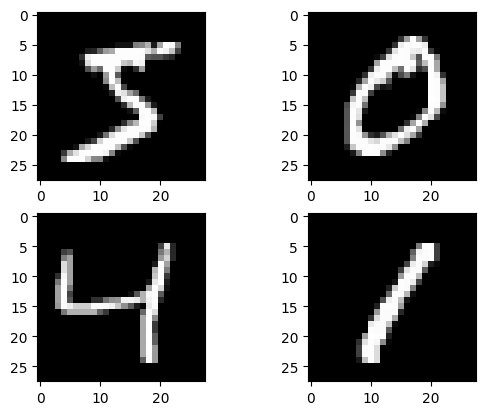

Классы: 5, 0, 4, 1
Тестовые данные


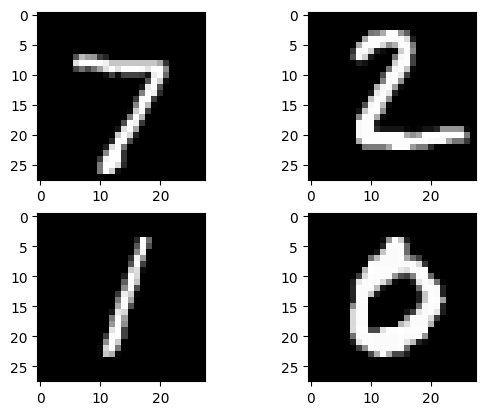

Классы 7, 2, 1, 0


In [ ]:
print("Обучающие данные")
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()
print(f"Классы: {y_train[0]}, {y_train[1]}, {y_train[2]}, {y_train[3]}")

print("Тестовые данные")
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
plt.show()

print(f"Классы {y_test[0]}, {y_test[1]}, {y_test[2]}, {y_test[3]}")

Предварительная обработка данных:

Учебный набор данных структурирован как трехмерный массив. Чтобы подготовить данные, сперва нужно представить изображения в виде одномерных массивов, так как каждый пиксель считается отдельным входным признаком. В этом случае изображения размером 28 × 28 будут преобразованы в массивы, содержащие 784 элементов.

Размерность до преобразований:

In [ ]:
X_train.shape # размерность тренировочного массива до преобразования

(60000, 28, 28)

Изменение формы:

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

784


Размерность после преобразований:

In [ ]:
X_train.shape # размерность тренировочного массива после преобразования

(60000, 784)

Значения пикселей заданы в оттенках серого со значениями от 0 до 255. Для эффективного обучения нейронных сетей производится нормализация значений пикселей в диапазоне от 0 до 1.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Выходная переменная представляет собой целое число от 0 до 9, т.к. это задача классификации с несколькими классами. Значения класса преобразуются в двоичный вектор (матрицу).

In [ ]:
from keras.utils import to_categorical

# преобразование правильных ответов в one-hot представление:
# векторы, в которых единственная единица на месте нужной цифры
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
print(y_test.shape)
y_train.shape

10
(10000, 10)


(60000, 10)

На основе выведенных данных можно убедиться, что теперь число класса представляет собой число из 10 цифр для каждого элемента.

Создание и обучение полносвязной модели с двумя слоями. На входном слое используется линейная функция активации. На выходном - softmax.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(64,input_dim=num_pixels, activation='linear'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

losses1 = history1.history['loss']
accuracies1 = history1.history['accuracy']

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3673 - accuracy: 0.8951 - val_loss: 0.2852 - val_accuracy: 0.9215
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.9172 - val_loss: 0.2928 - val_accuracy: 0.9193
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.9216 - val_loss: 0.2887 - val_accuracy: 0.9207
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.9241 - val_loss: 0.2791 - val_accuracy: 0.9215
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2714 - accuracy: 0.9248 - val_loss: 0.2997 - val_accuracy: 0.9185
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.9253 - val_loss: 0.2851 - val_accuracy: 0.9214
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9254 - val_loss: 0.2802 - val_accuracy:

Создается датафрейм из полученных значений.

In [ ]:
import pandas as pd

# Создание списка данных для датафрейма
data = {'Номер эксперимента': [1],
        'Модель': ['DNN'],
        'Архитектура': ['D-64'],
        'Количество_слоев': [2],
        'Функция_активации': ['linear'],
        'Количество эпох': [20],
        'Точность': [accuracies1[-1]],
        'Потери': [losses1[-1]]}

fin_table = pd.DataFrame(data)

Выводятся classification_report и confusion_matrix.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_test_labels = np.argmax(y_test, axis=1) # формат изменяется в числовой
y_pred_prob1 = model1.predict(X_test) # для каждого рисунка - вероятности для каждого класса
y_pred1 = np.argmax(y_pred_prob1, axis=1) # для каждого рисунка - класс

print("Для модели 1")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred1))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred1))

313/313 [==============================] - 1s 2ms/step
Для модели 1
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.95      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.90      0.95      0.92       982
           5       0.89      0.87      0.88       892
           6       0.92      0.96      0.94       958
           7       0.94      0.90      0.92      1028
           8       0.90      0.87      0.89       974
           9       0.88      0.92      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion Matrix:
[[ 940    0    1    2    6   10   17    2    2    0]
 [   0 1116    5    2    0    1    4    2    5    0]
 [   3    5  926   16   12

Precision (точность), Recall (полнота) и F1-score (гармоническое среднее точности и полноты) указывают на высокую точность и полноту модели в предсказании каждого класса. Support (количество объектов каждого класса в тестовой выборке) показывает, что классы представлены примерно равномерно. Accuracy (точность) свидетельствует о хорошей производительности модели в целом. Матрица ошибок выявляет некоторые проблемы с классификацией объектов из определенных классов, таких как классы 2, 8 и 9, где количество ошибок выше, чем для других классов.


Построение графиков потерь и точности обучения по эпохам.

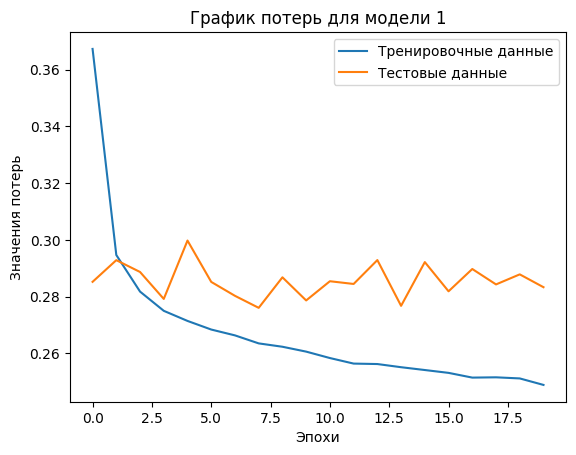

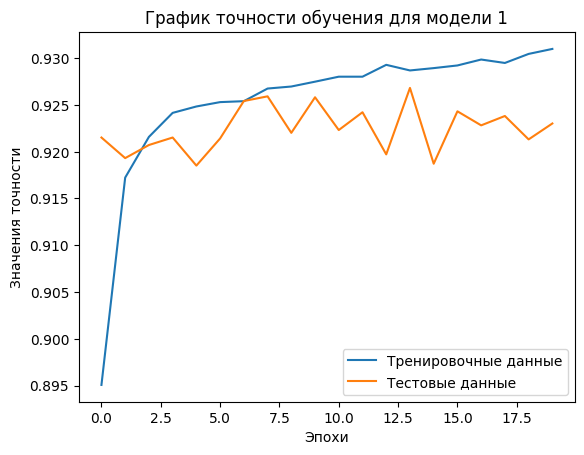

In [ ]:
plt.plot(history1.history['loss'], label='Тренировочные данные')
plt.plot(history1.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 1')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history1.history['accuracy'], label='Тренировочные данные')
plt.plot(history1.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 1')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

В начале обучения модель показывает высокие значения потерь, но с увеличением числа эпох они снижаются, что свидетельствует о улучшении результатов. Примерно на эпохах 3-7 наблюдаются высокие тестовые показатели. Далее наблюдаются нестабильные значения на тестовых данных, которые то падают, то возрастают, при стабильном улучшении тренировочных показателей. Такие колебания тестовых данных могут быть связаны с переобучением модели после 3-7 эпохи.

Вторая модель: На входном слое используется ReLu нелинейная функция активации. На выходном - softmax. 20 эпох.

In [ ]:
model2 = Sequential()
model2.add(Dense(64,input_dim=num_pixels, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

losses2 = history2.history['loss']
accuracies2 = history2.history['accuracy']

new_row2 = {'Номер эксперимента': 2,
        'Модель': 'DNN',
        'Архитектура': 'D-64',
        'Количество_слоев': 2,
        'Функция_активации': 'relu',
        'Количество эпох': 20,
        'Точность': accuracies2[-1],
        'Потери': losses2[-1]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row2])], ignore_index=True)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.9125 - val_loss: 0.1767 - val_accuracy: 0.9487
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1501 - accuracy: 0.9556 - val_loss: 0.1278 - val_accuracy: 0.9628
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9682 - val_loss: 0.1045 - val_accuracy: 0.9692
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0843 - val_accuracy: 0.9734
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0853 - val_accuracy: 0.9737
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0851 - val_accuracy:

Делается предсказание для второй модели и выводятся данные classification report, confusion matrix.

In [ ]:
y_pred_prob2 = model2.predict(X_test)
y_pred2 = np.argmax(y_pred_prob2, axis=1)

print("Для модели 2")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred2))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred2))

313/313 [==============================] - 0s 1ms/step
Для модели 2
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.96      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[ 972    0    0    1    0    2    2    1    2    0]
 [   0 1110    3    2    0    0    2    1   17    0]
 [   4    1  990    8    5

Модель 2 демонстрирует высокую точность, полноту и f1-score для всех классов в Classification Report, указывая на отличную производительность в распознавании этих классов. Confusion Matrix показывает малое количество ошибок классификации, с высоким значением правильных предсказаний и низким количеством неправильных, хотя некоторые классы имеют некоторые ошибки. Что говорит о том, что есть возможность улучшить модель для этих классов.

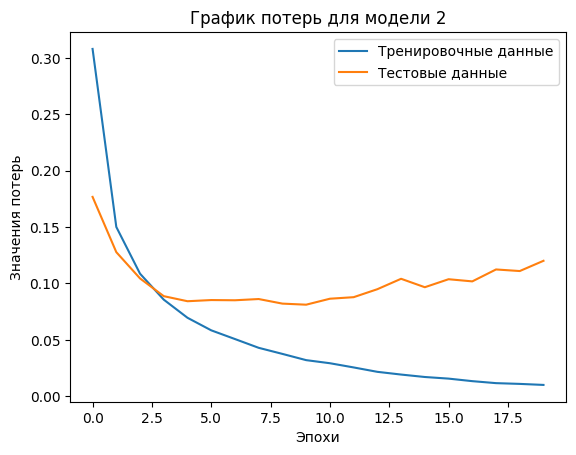

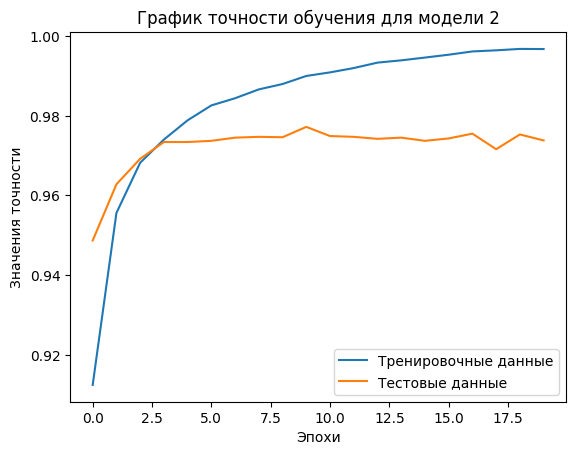

In [ ]:
plt.plot(history2.history['loss'], label='Тренировочные данные')
plt.plot(history2.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 2')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history2.history['accuracy'], label='Тренировочные данные')
plt.plot(history2.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 2')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

Начиная с 3 эпохи на тестовых данных по потерям наблюдается тенденция к увеличению, по точности - к уменьшению. Это сведетельствует о начале переобучения, так как графики на тренировочных данных продолжают улучшаться и слишком подстраиваются под них, становясь неспособными выявлять зависимости на другом наборе. На графиках можно заметить увеличение расстояния между графиками для тестового и тренировочного наборов.

Проведен новый эксперимент с тремя слоями (увеличено на один). При обучении размер наборов был увеличен до 128. Количество эпох - 40.

Epoch 1/40
469/469 [==============================] - 3s 4ms/step - loss: 0.4167 - accuracy: 0.8831 - val_loss: 0.2134 - val_accuracy: 0.9360
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9493 - val_loss: 0.1496 - val_accuracy: 0.9560
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1340 - accuracy: 0.9609 - val_loss: 0.1267 - val_accuracy: 0.9617
Epoch 4/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1088 - accuracy: 0.9681 - val_loss: 0.1076 - val_accuracy: 0.9671
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9732 - val_loss: 0.1019 - val_accuracy: 0.9687
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0779 - accuracy: 0.9775 - val_loss: 0.0956 - val_accuracy: 0.9710
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0898 - val_accuracy: 0.9727
Epoch 

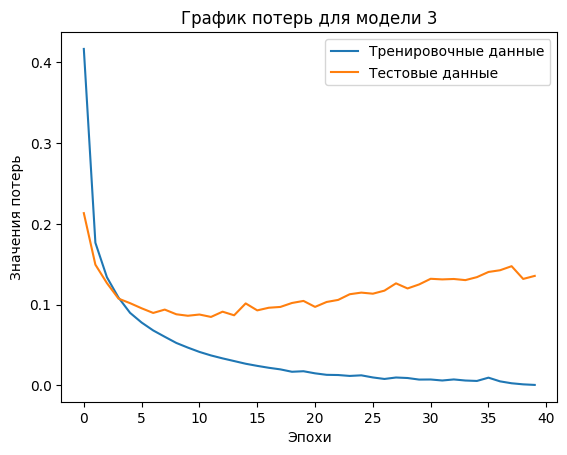

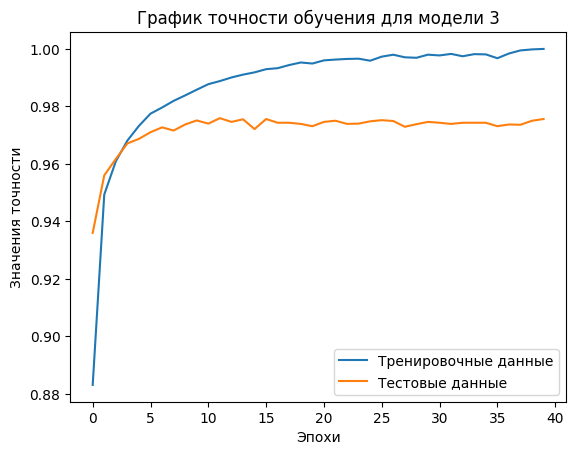

In [ ]:
model3 = Sequential()
model3.add(Dense(64,input_dim=num_pixels, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test))

losses3 = history3.history['loss']
accuracies3 = history3.history['accuracy']

new_row3 = {'Номер эксперимента': 3,
        'Модель': 'DNN',
        'Архитектура': 'D-64, D-32',
        'Количество_слоев': 3,
        'Функция_активации': 'relu',
        'Количество эпох': 40,
        'Точность': accuracies3[-1],
        'Потери': losses3[-1]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row3])], ignore_index=True)

y_pred_prob3 = model3.predict(X_test)
y_pred3 = np.argmax(y_pred_prob3, axis=1)

print("Для модели 3")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred3))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred3))

plt.plot(history3.history['loss'], label='Тренировочные данные')
plt.plot(history3.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 3')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history3.history['accuracy'], label='Тренировочные данные')
plt.plot(history3.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 3')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

Показатели classification report высоки для всех классов. Матрица неточностей показываает, что количество неверно распознанных данных низкое, однако есть некоторые классы, с уровнем ошибок выше, чем в других.

По графикам видно, что процесс предположительно переобучения наблюдается примерно с 7-11 эпохи. Значения точности на тестовых данных немного колеблются и плавно снижаются. Значения потерь на тестовом наборе имеют тенденцию к увеличению с течением эпох после достижения минимумов. Предположение о переобучении также подтверждается расхождением графиков потерь на тренировочном и тестовом наборах.

Создана новая модель с 3 слоями как и предыдущая, но другой функцией активации - PReLU. PReLU (Parametric Rectified Linear Unit) - это функция активации, которая расширяет идею ReLU, позволяя нейронам иметь наклонный отклик, вместо фиксированного нуля при отрицательных значениях входа. В PReLU отрицательная часть функции ReLU имеет небольшой наклон, который устанавливается как параметр, обучаемый вместе с остальными параметрами сети в процессе обучения. Это позволяет сети лучше обучаться и адаптироваться к различным данным, особенно когда много наблюдается отрицательных значений.

Epoch 1/40
469/469 [==============================] - 3s 5ms/step - loss: 0.4167 - accuracy: 0.8826 - val_loss: 0.1926 - val_accuracy: 0.9431
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1711 - accuracy: 0.9504 - val_loss: 0.1529 - val_accuracy: 0.9550
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1238 - accuracy: 0.9642 - val_loss: 0.1158 - val_accuracy: 0.9668
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0966 - accuracy: 0.9718 - val_loss: 0.1032 - val_accuracy: 0.9701
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9804 - val_loss: 0.0921 - val_accuracy: 0.9727
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0913 - val_accuracy: 0.9730
Epoch 

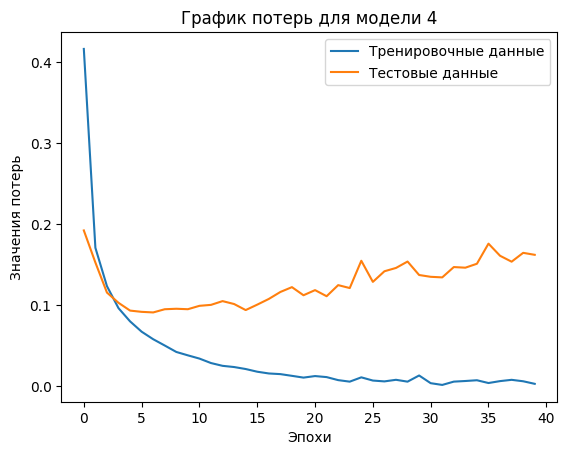

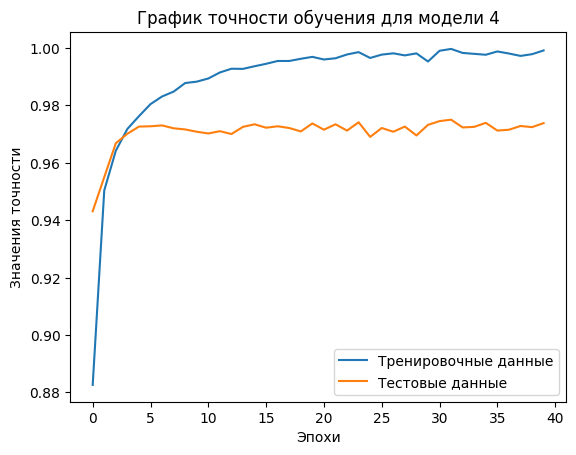

In [ ]:
model4 = Sequential()
model4.add(Dense(64,input_dim=num_pixels, activation='PReLU'))
model4.add(Dense(32, activation='PReLU'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test))

losses4 = history4.history['loss']
accuracies4 = history4.history['accuracy']

new_row4 = {'Номер эксперимента': 4,
        'Модель': 'DNN',
        'Архитектура': 'D-64, D-32',
        'Количество_слоев': 3,
        'Функция_активации': 'PReLU',
        'Количество эпох': 40,
        'Точность': accuracies4[-1],
        'Потери': losses4[-1]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row4])], ignore_index=True)

y_pred_prob4 = model4.predict(X_test)
y_pred4 = np.argmax(y_pred_prob4, axis=1)

print("Для модели 4")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred4))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred4))

plt.plot(history4.history['loss'], label='Тренировочные данные')
plt.plot(history4.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 4')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history4.history['accuracy'], label='Тренировочные данные')
plt.plot(history4.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 4')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

Значения метрик по данным classification report высоки, однако есть классы с более низкими показателями. Средние значения ниже, чем у предыдущей модели. Количество неверно классифицированных данных также выше, что определяет ухудшение качества с изменением функции акивации с ReLU на PReLU.

По данным графиков можно заметить, что после примерно 7 эпохи значения потерь на тестовых данных начинают возрастать, а значения точности - падать, в то время как показатели для тренировочных данных продолжают улучшаться. Можно предположить, что происходит переобучение модели. Также это подтверждается постоянным отдолением тренировочныого графика потерь от тестового.

Исходя результатов сравнения функций ReLU и PReLU, можно заметить, что результаты распознавания примерно одинаковы и хороши, однако есть некоторые отклонения в худшую сторону у модели с PReLU.

Проводится эксперимент с добавлением четвертого слоя и увеличении количества нейронов до 128 на входном слое. Объем выборки разбиения был увеличен до 256.

Epoch 1/40
235/235 [==============================] - 3s 6ms/step - loss: 0.4890 - accuracy: 0.8605 - val_loss: 0.2093 - val_accuracy: 0.9375
Epoch 2/40
235/235 [==============================] - 1s 5ms/step - loss: 0.1690 - accuracy: 0.9504 - val_loss: 0.1455 - val_accuracy: 0.9573
Epoch 3/40
235/235 [==============================] - 1s 5ms/step - loss: 0.1203 - accuracy: 0.9644 - val_loss: 0.1140 - val_accuracy: 0.9644
Epoch 4/40
235/235 [==============================] - 1s 5ms/step - loss: 0.0906 - accuracy: 0.9735 - val_loss: 0.0987 - val_accuracy: 0.9694
Epoch 5/40
235/235 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.0947 - val_accuracy: 0.9705
Epoch 6/40
235/235 [==============================] - 1s 5ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0850 - val_accuracy: 0.9733
Epoch 7/40
235/235 [==============================] - 2s 8ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0818 - val_accuracy: 0.9740
Epoch 

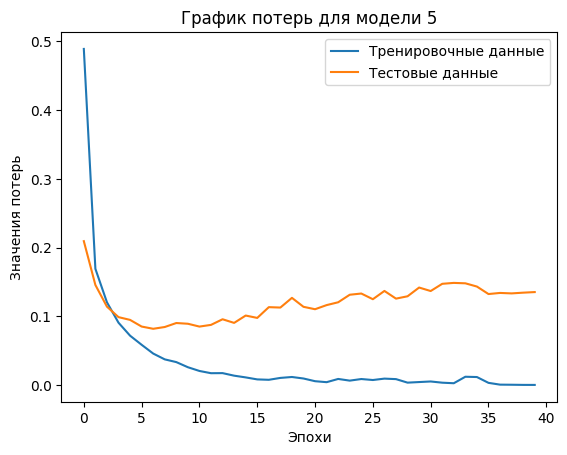

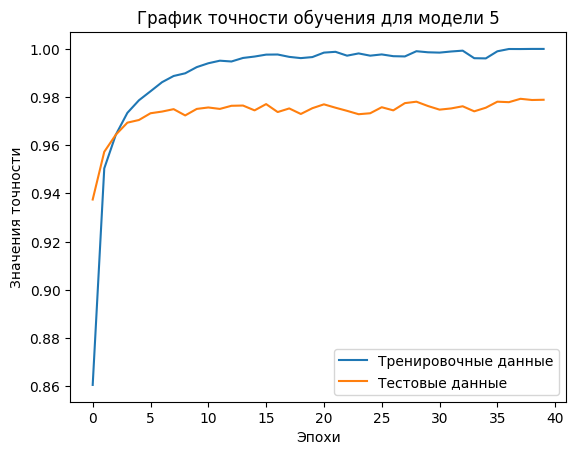

In [ ]:
model5 = Sequential()
model5.add(Dense(128,input_dim=num_pixels, activation='PReLU'))
model5.add(Dense(64, activation='PReLU'))
model5.add(Dense(32, activation='PReLU'))
model5.add(Dense(10, activation='softmax'))

model5.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history5 = model5.fit(X_train, y_train, epochs=40, batch_size=256, validation_data=(X_test, y_test))

losses5 = history5.history['loss']
accuracies5 = history5.history['accuracy']

new_row5 = {'Номер эксперимента': 5,
        'Модель': 'DNN',
        'Архитектура': 'D-128, D-64, D-32',
        'Количество_слоев': 4,
        'Функция_активации': 'PReLU',
        'Количество эпох': 40,
        'Точность': accuracies5[-1],
        'Потери': losses5[-1]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row5])], ignore_index=True)

y_pred_prob5 = model5.predict(X_test)
y_pred5 = np.argmax(y_pred_prob5, axis=1)

print("Для модели 5")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred5))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred5))

plt.plot(history5.history['loss'], label='Тренировочные данные')
plt.plot(history5.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 5')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history5.history['accuracy'], label='Тренировочные данные')
plt.plot(history5.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 5')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

На основе значений метрик видно высокие показатели модели для всех классов, что лучше относительно предыдущей модели. Также неточности классификации для всех классов не велики и значительно снизились относительно предыдущих значений.

Графики примерно с 7 эпохи для тестовых данных начинают ухудшаться, потери растут, точность начинает колебаться, оставаясь в одном диапазоне. Тренировочные показатели стабильно улучшаются. Такое поведение может быть следствием наступившего переобучения модели. На графике потерь можно заметить сильное отдоление линий тренировочного и тестового наборов, что может говорить об ухудшении модели с течением времени из-за предположительного переобучения.

Создается свёрточная нейронная сеть с одним блоком свёртки.
1. Conv2D. Этот слой свертки используется для извлечения признаков из изображений. Он состоит из 32 сверточных фильтров размером 3x3. Активация 'relu' используется после свертки для введения нелинейности.
2. MaxPooling2D. После каждого сверточного слоя следует слой пулинга для уменьшения размерности. Здесь используется пулинг с размером пула 2x2, который выбирает максимальное значение из каждой области 2x2.
3. Dropout. Этот слой Dropout применяется для регуляризации сети и предотвращения переобучения. В данном случае, 25% нейронов случайным образом отключаются во время обучения.
4. Flatten. После серии сверток и пулинга, данные сглаживаются в одномерный вектор перед передачей на полностью связанные слои.
Dense: Полносвязный слой с 128 нейронами, активация 'relu'. Этот слой представляет собой обычный слой нейронов, каждый из которых соединен со всеми нейронами предыдущего слоя.
5. Dense (output). Последний слой полносвязной сети с количеством нейронов, равным числу классов (в данном случае, вероятно, 10 для распознавания цифр). Активация 'softmax' используется для получения вероятностного распределения по всем классам, что делает его подходящим для многоклассовой классификации.

Epoch 1/40
300/300 - 5s - loss: 0.2725 - accuracy: 0.9223 - val_loss: 0.0867 - val_accuracy: 0.9752 - 5s/epoch - 16ms/step
Epoch 2/40
300/300 - 1s - loss: 0.0874 - accuracy: 0.9742 - val_loss: 0.0602 - val_accuracy: 0.9804 - 1s/epoch - 4ms/step
Epoch 3/40
300/300 - 1s - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0480 - val_accuracy: 0.9837 - 1s/epoch - 4ms/step
Epoch 4/40
300/300 - 1s - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0412 - val_accuracy: 0.9871 - 1s/epoch - 5ms/step
Epoch 5/40
300/300 - 1s - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0412 - val_accuracy: 0.9866 - 1s/epoch - 5ms/step
Epoch 6/40
300/300 - 1s - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0407 - val_accuracy: 0.9856 - 1s/epoch - 4ms/step
Epoch 7/40
300/300 - 1s - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0376 - val_accuracy: 0.9865 - 1s/epoch - 4ms/step
Epoch 8/40
300/300 - 1s - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0359 - val_accuracy: 0.9872 - 1s/epoch - 4ms/step
Epoch 9/40
300/300 - 1s

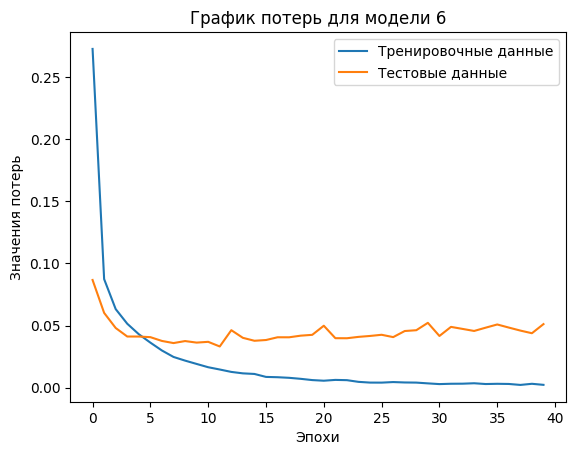

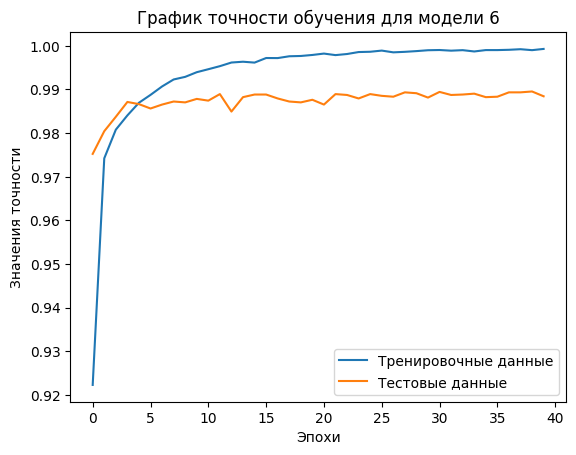

In [ ]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=200, verbose=2)
scores6 = model6.evaluate(X_test, y_test, verbose=0)

new_row5 = {'Номер эксперимента': 6,
        'Модель': 'CNN',
        'Архитектура': 'Conv, Pool, Dropout, D-128',
        'Количество_слоев': 5,
        'Функция_активации': 'ReLU',
        'Количество эпох': 40,
        'Точность': scores6[1],
        'Потери': scores6[0]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row5])], ignore_index=True)

plt.plot(history6.history['loss'], label='Тренировочные данные')
plt.plot(history6.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 6')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history6.history['accuracy'], label='Тренировочные данные')
plt.plot(history6.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 6')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

На основе графиков можно заметить, что, начиная примерно с 11 эпохи, тестовые показатели начинают ухадьшаться, в то время как тренировочные стабильно улучшаются. Такое поведение графиков может говорить о том, что модель слишком хорошо запомнила тренировочные данные и не может также хорошо выявлять зависимости при новых вводых. Линии тренировочных и тестовых графиков достаточно близки друг к другу, однако с 3 эпохи они немного расходятся, когда тренировочных график продолжает улучшаться, а тестовый колеблется в одном диапазоне с тенденцией к минимальному улучшеню.

В качестве усложнения структуры для новой CNN был добавлен еще один слой свертки с 64 нейронами.

Epoch 1/40
100/100 - 6s - loss: 0.3606 - accuracy: 0.8981 - val_loss: 0.0953 - val_accuracy: 0.9716 - 6s/epoch - 56ms/step
Epoch 2/40
100/100 - 3s - loss: 0.0821 - accuracy: 0.9762 - val_loss: 0.0554 - val_accuracy: 0.9831 - 3s/epoch - 28ms/step
Epoch 3/40
100/100 - 3s - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0412 - val_accuracy: 0.9866 - 3s/epoch - 29ms/step
Epoch 4/40
100/100 - 3s - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0381 - val_accuracy: 0.9875 - 3s/epoch - 29ms/step
Epoch 5/40
100/100 - 3s - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0324 - val_accuracy: 0.9889 - 3s/epoch - 29ms/step
Epoch 6/40
100/100 - 3s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9892 - 3s/epoch - 28ms/step
Epoch 7/40
100/100 - 3s - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0383 - val_accuracy: 0.9876 - 3s/epoch - 32ms/step
Epoch 8/40
100/100 - 3s - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0349 - val_accuracy: 0.9886 - 3s/epoch - 30ms/step
Epoch 9/40
100/1

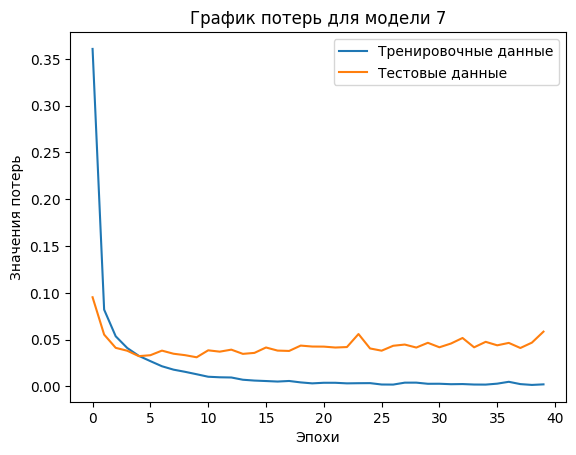

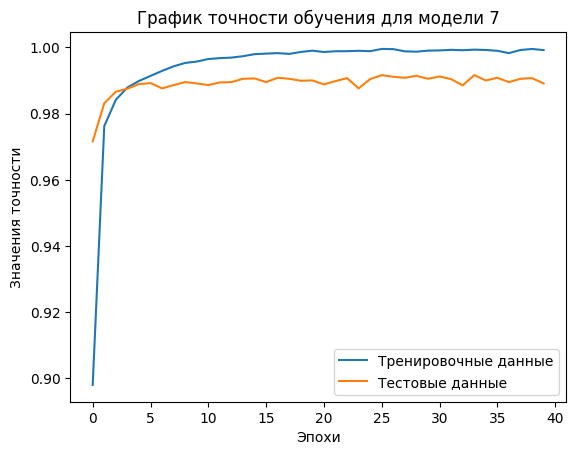

In [ ]:
model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history7 = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=600, verbose=2)
scores7 = model7.evaluate(X_test, y_test, verbose=0)

new_row7 = {'Номер эксперимента': 7,
        'Модель': 'CNN',
        'Архитектура': 'Conv-32, Conv-64, Pool, Dropout, D-128',
        'Количество_слоев': 6,
        'Функция_активации': 'ReLU',
        'Количество эпох': 40,
        'Точность': scores7[1],
        'Потери': scores7[0]}

fin_table = pd.concat([fin_table, pd.DataFrame([new_row7])], ignore_index=True)

plt.plot(history7.history['loss'], label='Тренировочные данные')
plt.plot(history7.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели 7')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history7.history['accuracy'], label='Тренировочные данные')
plt.plot(history7.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности обучения для модели 7')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

По данным графиков 7 модели можно заметить остановку роста потерь и точности на тестовых данных после примерно 4 эпохи. Примерно на 25 эпохе значения точности на тестовом наборе достигают максимума, в то время как потери продолжают понемногу увеличиваться. Предположительно переобучение модели могло наступить на 4 эпохе. Однако графики тестовых и тренировочных данных близки друг к другу, что может говорить о высоком качестве модели. Оптимальным количеством эпох обучения данной модели можно считать 4 эпохи.

In [ ]:
fin_table

,Номер эксперимента,Модель,Архитектура,Количество_слоев,Функция_активации,Количество эпох,Точность,Потери
0,1,DNN,D-64,2,linear,20,0.930967,0.248804
1,2,DNN,D-64,2,relu,20,0.996717,0.010121
2,3,DNN,"D-64, D-32",3,relu,40,0.999983,0.000714
3,4,DNN,"D-64, D-32",3,PReLU,40,0.999117,0.003172
4,5,DNN,"D-128, D-64, D-32",4,PReLU,40,1.000000,0.000083
5,6,CNN,"Conv, Pool, Dropout, D-128",5,ReLU,40,0.988400,0.051185
6,7,CNN,"Conv-32, Conv-64, Pool, Dropout, D-128",6,ReLU,40,0.989100,0.058545


Так как в таблице выше точность и потери приведены для последнего этапа обучения для тренировочных данных, для сравнения лучше использовать средние показатели для тестовых данных. Следовательно, требуется изменение параметров соответствующих в таблице. Для этого создается новая таблица.

In [ ]:
data = {'Номер эксперимента': [1, 2, 3, 4, 5, 6, 7],
        'Модель': ['DNN', 'DNN', 'DNN', 'DNN', 'DNN', 'CNN', 'CNN'],
        'Архитектура': ['D-64', 'D-64', 'D-64, D-32', 'D-64, D-32', 'D-128, D-64, D-32',
                       'Conv-32, Pool, Dropout, D-128', 'Conv-32, Conv-64, Pool, Dropout, D-128' ],
        'Количество_слоев': [2, 2, 3, 3, 4, 5, 6],
        'Функция_активации': ['linear', 'ReLU', 'ReLU', 'PReLU', 'PReLU', 'ReLU', 'ReLU'],
        'Количество эпох': [20, 20, 40, 40, 40, 40, 40],
        'Точность': [np.mean(history1.history['val_accuracy']), np.mean(history2.history['val_accuracy']), np.mean(history3.history['val_accuracy']),
                     np.mean(history4.history['val_accuracy']), np.mean(history5.history['val_accuracy']), np.mean(history6.history['val_accuracy']),
                     np.mean(history7.history['val_accuracy'])],
        'Потери': [np.mean(history1.history['val_loss']), np.mean(history2.history['val_loss']), np.mean(history3.history['val_loss']),
                     np.mean(history4.history['val_loss']), np.mean(history5.history['val_loss']), np.mean(history6.history['val_loss']),
                     np.mean(history7.history['val_loss'])]}

fin_table2 = pd.DataFrame(data)
fin_table2

,Номер эксперимента,Модель,Архитектура,Количество_слоев,Функция_активации,Количество эпох,Точность,Потери
0,1,DNN,D-64,2,linear,20,0.922445,0.285535
1,2,DNN,D-64,2,ReLU,20,0.972235,0.101077
2,3,DNN,"D-64, D-32",3,ReLU,40,0.972068,0.114890
3,4,DNN,"D-64, D-32",3,PReLU,40,0.970842,0.126629
4,5,DNN,"D-128, D-64, D-32",4,PReLU,40,0.973650,0.119445
5,6,CNN,"Conv-32, Pool, Dropout, D-128",5,ReLU,40,0.987423,0.044385
6,7,CNN,"Conv-32, Conv-64, Pool, Dropout, D-128",6,ReLU,40,0.989150,0.043150


Анализ таблицы экспериментов:

Сверточные нейронные сети (CNN) превосходят полносвязные нейронные сети (DNN) в задачах обработки изображений, так как имеют более высокие значения точности и низкие значения потерь. CNN эффективно улавливают пространственные зависимости в изображениях благодаря сверточным слоям, пулингу и слоям отсева, что приводит к лучшей обобщающей способности модели.

Использование нелинейных функций активации в DNN приводит к улучшению показателей в задаче распознавания изображений. Увеличение количества эпох обучения немного ухудшает средние показатели. При сравнении моделей с одинаковой архитектурой за исключением функции активации можно заметить, что есть ухудшения при использовании PReLU вместо ReLU. Однако при увеличении слоев модель начинает показывать результаты гораздо выше всех предыдущих.  Сравнение всех DNN из таблицы между собой не совсем уместно в виду различий в количестве эпох обучения, функциях активации и количестве слоев и нейронов в них.

CNN с увеличением количества слоев свертки показывает более высокие результаты точности и более низкие потери, что выделяет модель 7 из всех наилучшим качеством.

Таким образом, при выборе модели для задачи распознавания изображений лучше использовать сверточные нейронные сети с нелинейными функциями активации, а также увеличивать глубину модели и число эпох обучения для достижения лучших результатов.

Создание двух собственных изображений рукописной цифры при помощи библиотеки Python Imagine Library.

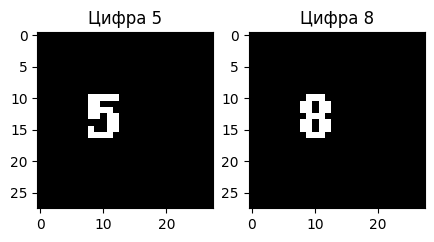

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# новое изображение размером 28x28 пикселей (черно-белое)
image1 = Image.new("L", (28, 28), color=0)  # 'L' означает режим черно-белого изображения

# объект ImageDraw для рисования на изображении
draw1 = ImageDraw.Draw(image1)

# цифра 5
draw1.text((8, 8), "5", fill=255)  # белый цвет (значение 255)

# сохранение
image1.save("digit_5.png")

# цифра 8
image2 = Image.new("L", (28, 28), color=0)
draw2 = ImageDraw.Draw(image2)
draw2.text((8, 8), "8", fill=255)
image2.save("digit_8.png")

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title("Цифра 5")

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title("Цифра 8")

plt.show()

Проверка предсказания на лучшей модели - 7.

In [ ]:
image1 = Image.open("digit_5.png")
# преобразование изображения к размеру 28x28 и формату (28, 28, 1)
image1 = image1.resize((28, 28))
image1 = np.array(image1) / 255.0  # нормализация значений пикселей
image1 = np.expand_dims(image1, axis=0)

image2 = Image.open("digit_8.png")
image2 = image2.resize((28, 28))
image2 = np.array(image2) / 255.0
image2 = np.expand_dims(image2, axis=0)

y_pred5 = model7.predict(image1)
y_pred8 = model7.predict(image2)
predicted_class5 = np.argmax(y_pred5)
predicted_class8 = np.argmax(y_pred8)
print(f"Предсказания для цифры 5: {predicted_class5}")
print(f"Предсказание для цифры 8: {predicted_class8}")

1/1 [==============================] - 0s 17ms/step
Предсказания для цифры 5: 5
Предсказание для цифры 8: 5


Проверка модели на самостоятельно составленных числах дала не верные результаты для второго изображения. Для первого она попала в нужный класс.

Создается нейронная сеть для распознавания изображений набора данных fashion-mnist с предметами одежды. Классы представляют собой предметы гардероба. Каждая цифра обозначает свой предмет:

Класс 0: Футболки (T-shirt/top): Включает в себя различные типы футболок, верхней одежды без воротника, такие как майки и футболки.

Класс 1: Брюки (Trouser): Содержит изображения различных типов брюк, включая джинсы, брюки и шорты.

Класс 2: Свитера (Pullover): В этом классе находятся изображения свитеров, толстовок и других верхней одежды с длинными рукавами без застежек.

Класс 3: Платья (Dress): Включает в себя изображения различных стилей платьев, включая повседневные платья, вечерние платья и т. д.

Класс 4: Пальто (Coat): Содержит изображения пальто, плащей и других верхней одежды, которая защищает от холода и ветра.

Класс 5: Сандалии (Sandal): В этом классе находятся изображения различных стилей женских и мужских сандалий.

Класс 6: Рубашки (Shirt): Содержит изображения различных типов рубашек с воротником, таких как поло, рубашки с длинными рукавами и т. д.

Класс 7: Кроссовки (Sneaker): Включает в себя изображения спортивной обуви, такой как кроссовки и кеды.

Класс 8: Сумки (Bag): Содержит изображения различных типов сумок и рюкзаков, используемых для хранения и переноски вещей.

Класс 9: Ботинки (Ankle boot): В этом классе находятся изображения ботинок, обуви с закрытыми мысками, которая обычно носится на ногах.

In [ ]:
# загрузка данных Fashion MNIST
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
y_train[0]

9

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.5419 - accuracy: 0.8039 - val_loss: 0.3982 - val_accuracy: 0.8551
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3477 - accuracy: 0.8734 - val_loss: 0.3408 - val_accuracy: 0.8798
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2990 - accuracy: 0.8917 - val_loss: 0.3217 - val_accuracy: 0.8826
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2695 - accuracy: 0.9029 - val_loss: 0.2913 - val_accuracy: 0.8937
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2490 - accuracy: 0.9089 - val_loss: 0.2837 - val_accuracy: 0.8985
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2249 - accuracy: 0.9171 - val_loss: 0.2647 - val_accuracy: 0.9048
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2075 - accuracy: 0.9240 - val_loss: 0.2611 - val_accuracy: 0.9046
Epoch 

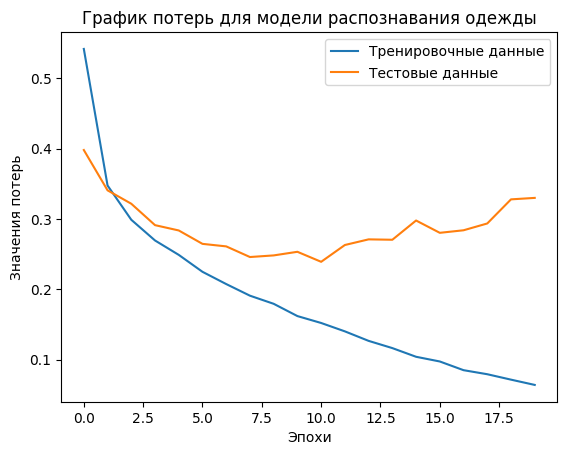

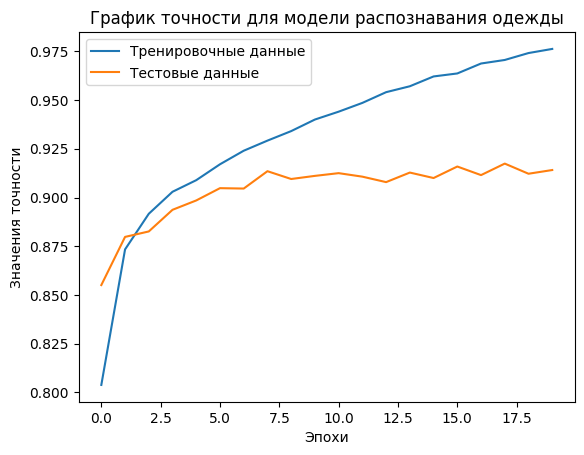

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 классов

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Точность на тестовых данных: %.2f%%" % (scores[1] * 100))

plt.plot(history.history['loss'], label='Тренировочные данные')
plt.plot(history.history['val_loss'], label='Тестовые данные')
plt.title('График потерь для модели распознавания одежды')
plt.xlabel('Эпохи')
plt.ylabel('Значения потерь')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Тренировочные данные')
plt.plot(history.history['val_accuracy'], label='Тестовые данные')
plt.title('График точности для модели распознавания одежды')
plt.xlabel('Эпохи')
plt.ylabel('Значения точности')
plt.legend()
plt.show()

Точность распознавания данных после 20 эпох обучения -  91.41%, что говорит о неплохом качестве модели.

На графиках видно, что примерно до 7 эпохи потери на тестовых и тренировочных данных уменьшаются, а точность увеличивается. После этого значения потерь на тестовых данных начинают увеличиваться. Точность на тренировочных данных колеблется примерно в одном диапазоне. Тренировочные показатели стабильно улучшаются. К концу обучения графики тренировочных и тестовых данных сильно расходятся, что может свидетельствовать о переобучении. Так как результаты не высоки можно улучшить модель, например, путем изменения архитектуры.

**Вывод**

В работе были созданы восемь различных нейронных сетей. Первые пять являются глубокими нейронными сетями с различной архитектурой, а другие три - сверточные нейронные сети. Семь были обучены для распознавания изображений рукописных цифр. Одна создана для распознавания образов предметов одежды. Все они выполняют задачу классификации изображений на 10 классов.

При сравнении качества моделей DNN и CNN на задаче классификации изображений было выявлено преимущество точности и качества CNN, благодаря сверточным слоям, пулингу и слоям отсева, чего нет в DNN. Также было замечено улучшение моделей с увеличением числа слоев и нейронов, а также использованием нелинейных функций активации.

Модель распознавания одежды показывает не высокие значения точности и не низкие значения потерь, что говорит о не высоком качестве модели. Предположительно есть проблема переобучения. Качество модели может быть улучшено, так как на данный момент она распознает данные в 91% случаев.